In [1]:
print('hello')

hello


In [2]:
import numpy as np
import pandas as pd
import scipy 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_ca42768e42614bd6a94aeb80144d698a = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='F3Z-r6TtqPsjlQTt9QqzatQenqNJaGENv7Iml6_TtMk6',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_ca42768e42614bd6a94aeb80144d698a.get_object(Bucket='predictinglifeexpectancy-donotdelete-pr-xhveednthzy4ni',Key='datasets_12603_17232_Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

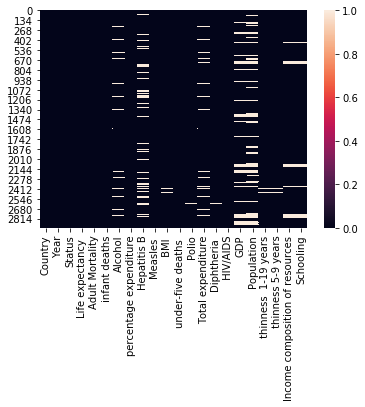

In [10]:
sns.heatmap(pd.isnull(data));


In [11]:
a=list(data.columns)
b=[]
for i in a:
    c=data[i].isnull().sum()
    b.append(c)
null_df=pd.DataFrame({'Feature name':a,'no. of Nan':b})
null_df

,Feature name,no. of Nan
0,Country,0
1,Year,0
2,Status,0
3,Life expectancy,10
4,Adult Mortality,10
5,infant deaths,0
6,Alcohol,194
7,percentage expenditure,0
8,Hepatitis B,553
9,Measles,0


In [12]:

data['Life expectancy ']=data['Life expectancy '].fillna(value=data['Life expectancy '].mean())


data['Adult Mortality']=data['Adult Mortality'].fillna(value=data['Adult Mortality'].mean())

In [13]:
corr_data=data.corr()
corr_data

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.169623,-0.078861,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.169623,1.000000,-0.696359,-0.196535,0.404029,0.381791,0.255760,-0.157574,0.564466,-0.222503,0.464531,0.216373,0.478465,-0.556457,0.461393,-0.021548,-0.476561,-0.470977,0.724631,0.748263
Adult Mortality,-0.078861,-0.696359,1.000000,0.078747,-0.195454,-0.242814,-0.161828,0.031174,-0.384806,0.094135,-0.274218,-0.114355,-0.274540,0.523727,-0.296019,-0.013639,0.302501,0.308053,-0.457530,-0.452380
infant deaths,-0.037415,-0.196535,0.078747,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404029,-0.195454,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381791,-0.242814,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.255760,-0.161828,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157574,0.031174,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.564466,-0.384806,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222503,0.094135,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


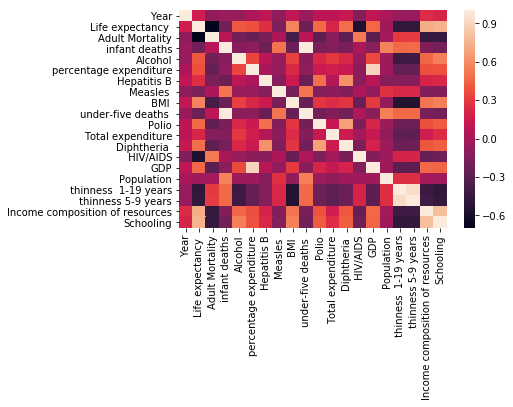

In [14]:
sns.heatmap(corr_data)

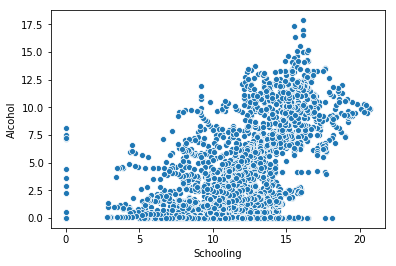

In [15]:
sns.scatterplot(x=data['Schooling'],y=data['Alcohol']);


In [16]:
def impute_Alcohol(cols):
    al=cols[0]
    sc=cols[1]
    if pd.isnull(al):
        if sc<=2.5:
            return 4.0
        elif 2.5<sc<=5.0:
            return 1.5
        elif 5.0<sc<=7.5:
            return 2.5
        elif 7.5<sc<=10.0:
            return 3.0
        elif 10.0<sc<=15:
            return 4.0
        elif sc>15:
            return 10.0
    else:
        return al
    
data['Alcohol']=data[['Alcohol','Schooling']].apply(impute_Alcohol,axis=1)

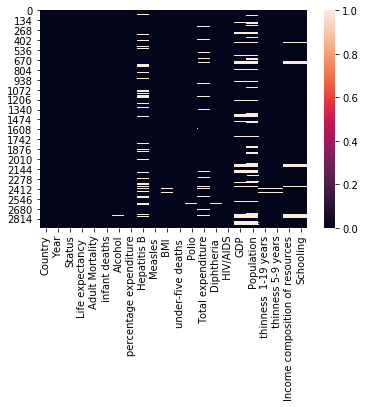

In [17]:
sns.heatmap(pd.isnull(data))

In [18]:
data['Alcohol']=data['Alcohol'].fillna(value=data['Alcohol'].mean())

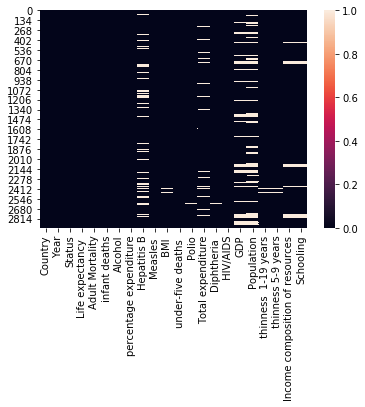

In [19]:
# Rechecking the Heatmap.
sns.heatmap(pd.isnull(data))

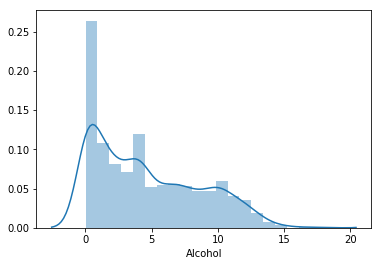

In [20]:
sns.distplot(data['Alcohol']);

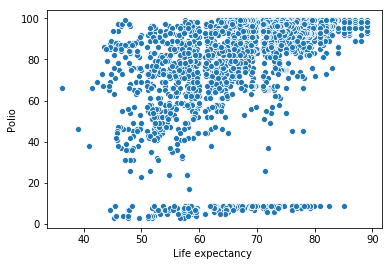

In [21]:
sns.scatterplot(x=data['Life expectancy '],y=data['Polio']);


In [22]:
def impute_polio(c):
    p=c[0]
    l=c[1]
    if pd.isnull(p):
        if l<=45:
            return 80.0
        elif 45<l<=50:
            return 67.0
        elif 50<l<=60:
            return 87.44
        elif 60<l<=70:
            return 91
        elif 70<l<=80:
            return 94.3
        elif l>80:
            return 95
    else:
        return p
    
data['Polio']=data[['Polio','Life expectancy ']].apply(impute_polio,axis=1)

In [23]:
a=list(data.columns)
b=[]
for i in a:
    c=data[i].isnull().sum()
    b.append(c)
null_df=pd.DataFrame({'Feature name':a,'no. of Nan':b})
null_df

,Feature name,no. of Nan
0,Country,0
1,Year,0
2,Status,0
3,Life expectancy,0
4,Adult Mortality,0
5,infant deaths,0
6,Alcohol,0
7,percentage expenditure,0
8,Hepatitis B,553
9,Measles,0


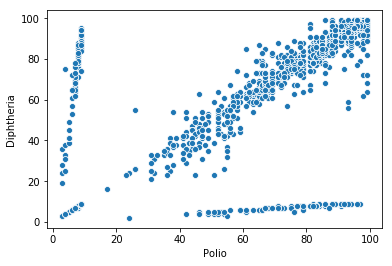

In [24]:
# Scatter plot between these features.

sns.scatterplot(x=data['Polio'],y=data['Diphtheria ']);

In [25]:
def impute_Diptheria(c):
    d=c[0]
    p=c[1]
    if pd.isnull(d):
        if p<=10:
            return 75.0
        elif 10<p<=40:
            return 37.0
        elif 40<p<=45:
            return 40.0
        elif 45<p<=50:
            return 50.0
        elif 50<p<=60:
            return 55.0
        elif 60<p<=80:
            return 65.0
        elif p>80:
            return 90.0
    else:
        return d
data['Diphtheria ']=data[['Diphtheria ','Polio']].apply(impute_Diptheria,axis=1)

In [26]:
a=list(data.columns)
b=[]
for i in a:
    c=data[i].isnull().sum()
    b.append(c)
null_df=pd.DataFrame({'Feature name':a,'no. of Nan':b})
null_df

,Feature name,no. of Nan
0,Country,0
1,Year,0
2,Status,0
3,Life expectancy,0
4,Adult Mortality,0
5,infant deaths,0
6,Alcohol,0
7,percentage expenditure,0
8,Hepatitis B,553
9,Measles,0


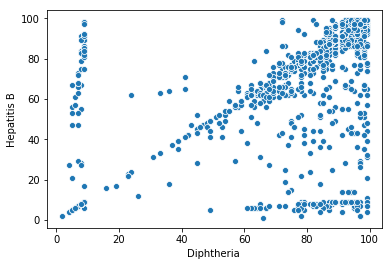

In [27]:
sns.scatterplot(x=data['Diphtheria '],y=data['Hepatitis B']);


In [28]:
def impute_HepatatisB(cols):
    hep=cols[0]
    dip=cols[1]
    if pd.isnull(hep):
        if dip<=15:
            return 75.0
        elif 15<dip<=30:
            return 20.0
        elif 30<dip<=45:
            return 38.0
        elif 45<dip<=60:
            return 43.0
        elif 60<dip<=80:
            return 63.0
        elif dip>80:
            return 88.4
    else:
        return hep
    
data['Hepatitis B']=data[['Hepatitis B','Diphtheria ']].apply(impute_HepatatisB,axis=1)

In [29]:
data[data['Diphtheria ']>80.0]['Hepatitis B'].mean()


88.39573481687472

In [30]:
a=list(data.columns)
b=[]
for i in a:
    c=data[i].isnull().sum()
    b.append(c)
null_df=pd.DataFrame({'Feature name':a,'no. of Nan':b})
null_df

,Feature name,no. of Nan
0,Country,0
1,Year,0
2,Status,0
3,Life expectancy,0
4,Adult Mortality,0
5,infant deaths,0
6,Alcohol,0
7,percentage expenditure,0
8,Hepatitis B,0
9,Measles,0


In [31]:
def impute_BMI(c):
    b=c[0]
    l=c[1]
    if pd.isnull(b):
        if l<=50:
            return 25.0
        elif 50<l<=60:
            return 25.0
        elif 60<l<=70:
            return 32.0
        elif 70<l<=80:
            return 46.8
        elif 80<l<=100:
            return 60.0
    else:
        return b
    
data[' BMI ']=data[[' BMI ','Life expectancy ']].apply(impute_BMI,axis=1)

In [32]:
a=list(data.columns)
b=[]
for i in a:
    c=data[i].isnull().sum()
    b.append(c)
null_df=pd.DataFrame({'Feature name':a,'no. of Nan':b})
null_df

,Feature name,no. of Nan
0,Country,0
1,Year,0
2,Status,0
3,Life expectancy,0
4,Adult Mortality,0
5,infant deaths,0
6,Alcohol,0
7,percentage expenditure,0
8,Hepatitis B,0
9,Measles,0


In [33]:
def impute_Total_exp(c):
    t=c[0]
    a=c[1]
    if pd.isnull(t):
        if a<=2.5:
            return 5.08
        elif 2.5<a<=5.0:
            return 6.0
        elif 5.0<a<=10.0:
            return 6.71
        elif 10.0<a<=12.5:
            return 6.9
        elif a>12.5:
            return 6.68
    else:
        return t
    
data['Total expenditure']=data[['Total expenditure','Alcohol']].apply(impute_Total_exp,axis=1)

In [34]:
def impute_GDP(c):
    g=c[0]
    p=c[1]
    if pd.isnull(g):
        if p<=1250:
            return 1100.0
        elif 1250<p<=2500:
            return 1800.0
        elif 2500<p<=3750:
            return 2900.0
        elif 3750<p<=7500:
            return 3500.0
        elif 7500<p<=8750:
            return 4500.0
        elif 8750<p<=10000:
            return 5000.0
        elif 10000<p<=11250:
            return 5700.0
        elif 11250<p<=12500:
            return 7000.0
        elif 12500<p<=15000:
            return 8000.0
        elif 15000<p<=17500:
            return 9000.0
        elif p>17500:
            return 8500.0
    else:
        return g
    
data['GDP']=data[['GDP','percentage expenditure']].apply(impute_GDP,axis=1)


In [35]:
def impute_population(c):
    p=c[0]
    i=c[1]
    if pd.isnull(p):
        if i<=100:
            return 0.19*((10)**9)
        elif 100<i<=250:
            return 0.18*((10)**9)
        elif 250<i<=350:
            return 0.02*((10)**9)
        elif 350<i<=900:
            return 0.1*((10)**9)
        elif 900<i<=1100:
            return 0.18*((10)**9)
        elif 1100<i<=1250:
            return 0.05*((10)**9)
        elif 1250<i<=1500:
            return 0.19*((10)**9)
        elif 1500<i<=1750:
            return 0.05*((10)**9)
        elif i>1750:
            return 0.1*((10)**9)
    else:
        return p
    
data['Population']=data[['Population','infant deaths']].apply(impute_population,axis=1)

In [36]:
def impute_Thin_1(c):
    t=c[0]
    b=c[1]
    if pd.isnull(t):
        if b<=10:
            return 5.0
        elif 10<b<=20:
            return 10.0
        elif 20<b<=30:
            return 8.0
        elif 30<b<=40:
            return 6.0
        elif 40<b<=50:
            return 3.0
        elif 50<b<=70:
            return 4.0
        elif b>70:
            return 1.0
    else:
        return t
    
data[' thinness  1-19 years']=data[[' thinness  1-19 years',' BMI ']].apply(impute_Thin_1,axis=1)

In [37]:
def impute_Thin_1(c):
    t=c[0]
    b=c[1]
    if pd.isnull(t):
        if b<=10:
            return 5.0
        elif 10<b<=20:
            return 10.0
        elif 20<b<=30:
            return 8.0
        elif 30<b<=40:
            return 6.0
        elif 40<b<=50:
            return 3.0
        elif 50<b<=70:
            return 4.0
        elif b>70:
            return 1.0
    else:
        return t
    
data[' thinness 5-9 years']=data[[' thinness 5-9 years',' BMI ']].apply(impute_Thin_1,axis=1)


In [38]:
def impute_Income(c):
    i=c[0]
    l=c[1]
    if pd.isnull(i):
        if l<=40:
            return 0.4
        elif 40<l<=50:
            return 0.42
        elif 50<l<=60:
            return 0.402
        elif 60<l<=70:
            return 0.54
        elif 70<l<=80:
            return 0.71
        elif l>80:
            return 0.88
    else:
        return i
        
data['Income composition of resources']=data[['Income composition of resources','Life expectancy ']].apply(impute_Income,axis=1)

In [39]:
def impute_schooling(c):
    s=c[0]
    l=c[1]
    if pd.isnull(s):
        if l<= 40:
            return 8.0
        elif 40<l<=44:
            return 7.5
        elif 44<l<50:
            return 8.1
        elif 50<l<=60:
            return 8.2
        elif 60<l<=70:
            return 10.5
        elif 70<l<=80:
            return 13.4
        elif l>80:
            return 16.5
    else:
        return s
    
data['Schooling']=data[['Schooling','Life expectancy ']].apply(impute_schooling,axis=1)

In [40]:
a=list(data.columns)
b=[]
for i in a:
    c=data[i].isnull().sum()
    b.append(c)
null_df=pd.DataFrame({'Feature name':a,'no. of Nan':b})
null_df

,Feature name,no. of Nan
0,Country,0
1,Year,0
2,Status,0
3,Life expectancy,0
4,Adult Mortality,0
5,infant deaths,0
6,Alcohol,0
7,percentage expenditure,0
8,Hepatitis B,0
9,Measles,0


In [41]:
y=data['Life expectancy ']

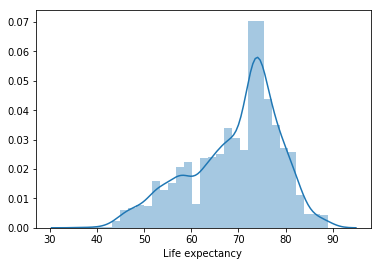

In [42]:
sns.distplot(y);


In [43]:
X=data.drop('Life expectancy ',axis=1)


In [44]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Adult Mortality                    2938 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2938 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2938 non-null float64
Measles                            2938 non-null int64
 BMI                               2938 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2938 non-null float64
Total expenditure                  2938 non-null float64
Diphtheria                         2938 non-null float64
 HIV/AIDS                          2938 non-null float64
GDP                                2938 non-null

In [45]:
X['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [46]:
X['Country'].nunique()

193

In [47]:
# Lets have look at the other object type feature.
X['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [48]:
Country_dummy=pd.get_dummies(X['Country'])
status_dummy=pd.get_dummies(X['Status'])

In [49]:
X.drop(['Country','Status'],inplace=True,axis=1)

In [50]:
X=pd.concat([X,Country_dummy,status_dummy],axis=1)

In [51]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Columns: 214 entries, Year to Developing
dtypes: float64(15), int64(4), uint8(195)
memory usage: 995.7 KB


In [52]:
from sklearn.model_selection import train_test_split

In [53]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [54]:
from sklearn.linear_model import LinearRegression


In [55]:
Linear_model= LinearRegression()


In [56]:
Linear_model.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [57]:
predictions1=Linear_model.predict(X_test)


In [58]:
predictions1[0:10]


array([52.90003432, 54.39454364, 83.57223797, 63.42111766, 73.59599301,
       72.44789087, 69.22029695, 80.42833482, 60.73071466, 82.95627229])

In [59]:
from sklearn.metrics import mean_squared_error


In [60]:
print(mean_squared_error(y_test,predictions1)**(0.5))


1.9152516365610135


In [62]:
from sklearn.metrics import r2_score
r2_score(y_test,predictions1)


0.9576136127019333

In [69]:
print('Train accuracy: ',Linear_model.score(X_train,y_train))
print('Test accuracy: ',Linear_model.score(X_test,y_test))

Train accuracy:  0.9647712099274287
Test accuracy:  0.9576136127019335
